--2026-01-16 17:28:11--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank.zip’

bank.zip                [    <=>             ] 565.47K   655KB/s    in 0.9s    

2026-01-16 17:28:13 (655 KB/s) - ‘bank.zip’ saved [579043]

Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                
Accuracy: 0.8983425414364641
[[781  26]
 [ 66  32]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       807
           1       0.55      0.33      0.41        98

    accuracy                           0.90       905
   macro avg       0.74      0.65      0.68       905
weighted avg       0.88      0.90      0.89       905


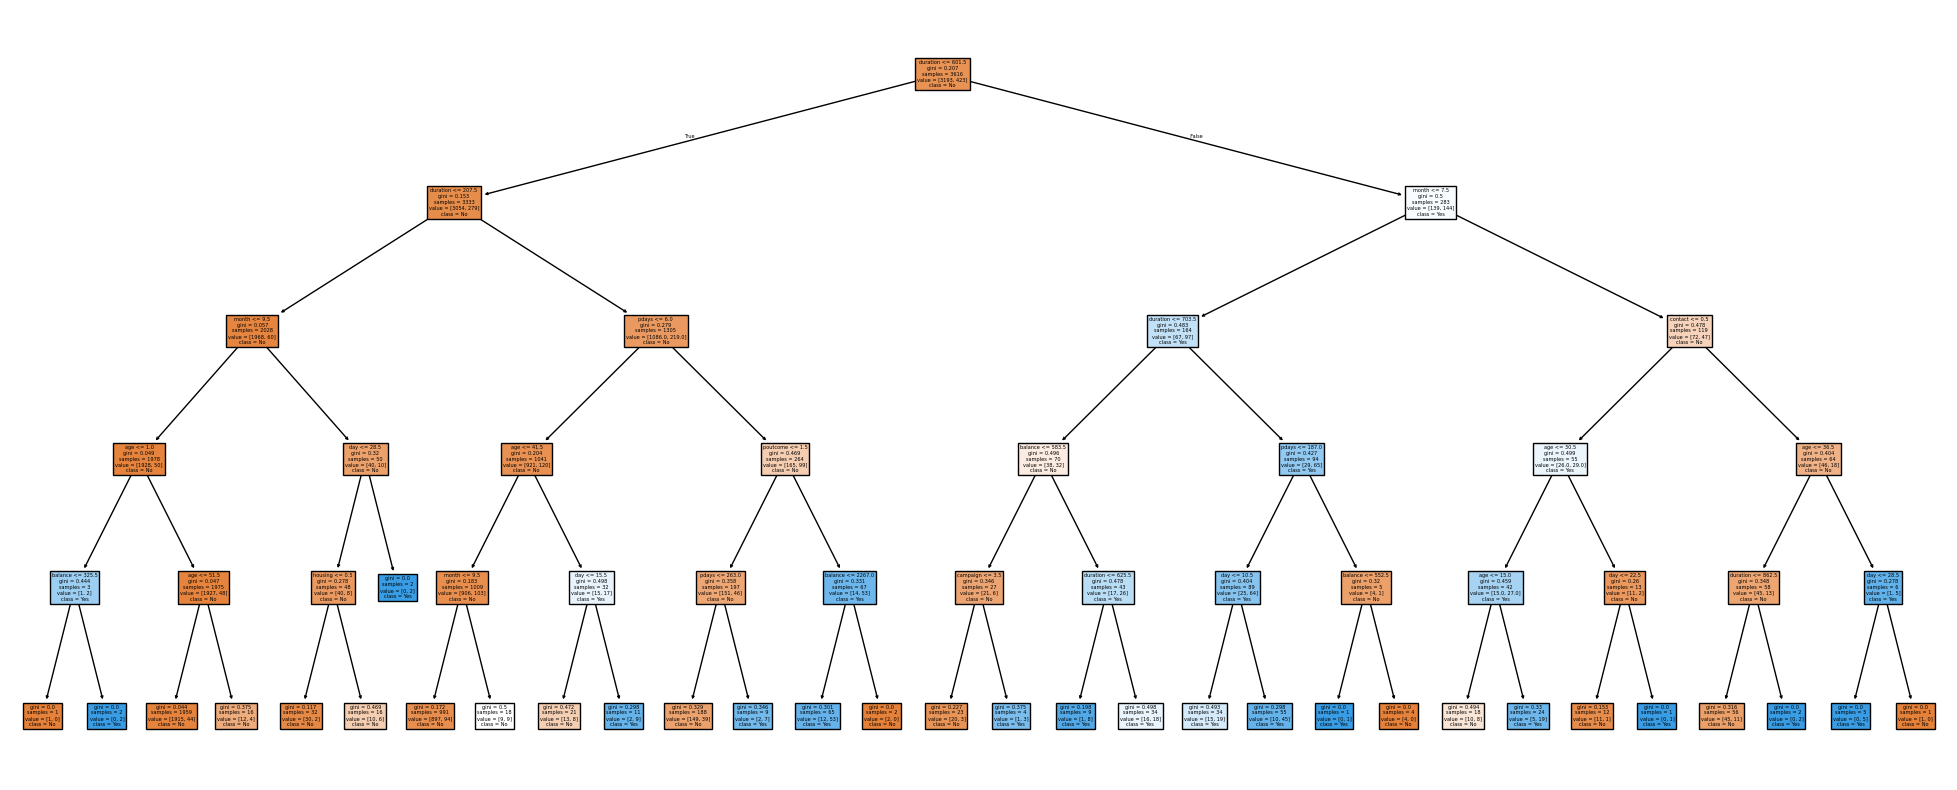

In [2]:
!wget -O bank.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
!unzip -o bank.zip

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("bank.csv", sep=";")

le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

X = df.drop("y", axis=1)
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.figure(figsize=(25,10))
plot_tree(model, feature_names=X.columns, class_names=["No","Yes"], filled=True)
plt.show()
